In [1]:
import pandas as pd 

In [2]:
df = pd.read_excel("./adni589-eur.xlsx")
df

,IID,DX,PTGENDER,PTMARRY,AGE,PTEDUCAT,CDRSB,ADAS11,ADAS13,ADASQ4,MMSE,RAVLTimmediate,RAVLTlearning,RAVLTforgetting,RAVLTpercforgetting,LDELTOTAL,TRABSCOR,FAQ
0,033_S_4505,CN,1,3,80.4,20,0.0,4.00,7.00,3,29,53.0,7,2.0,14.2857,18,99.000000,1.0
1,014_S_4080,CN,1,3,78.6,16,0.0,7.00,12.00,4,28,31.0,7,9.0,100.0000,18,90.000000,0.0
2,023_S_1190,CN,1,1,76.5,13,0.0,2.33,3.33,1,30,43.0,11,5.0,38.4615,18,76.000000,0.0
3,067_S_0257,CN,1,0,78.5,6,0.0,5.67,6.67,0,29,47.0,3,3.0,27.2727,13,70.000000,0.0
4,072_S_0315,CN,0,1,71.5,16,0.0,6.67,11.67,4,28,36.0,6,8.0,72.7273,12,92.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584,003_S_4152,AD,0,1,60.7,18,6.0,37.00,51.00,9,20,5.0,0,1.0,100.0000,3,236.007592,16.0
585,009_S_4388,CN,0,1,66.8,18,0.5,4.00,6.00,1,29,57.0,9,0.0,0.0000,16,86.000000,0.0
586,072_S_4613,MCI,0,1,67.8,20,1.5,9.00,16.00,7,27,45.0,5,11.0,100.0000,10,113.000000,2.0
587,023_S_0042,MCI,0,1,72.8,18,0.5,7.00,12.00,5,30,29.0,6,8.0,88.8889,1,101.000000,2.0


In [24]:
features = ['AGE', 'PTEDUCAT', 'CDRSB', 'ADAS11', 'ADAS13',
       'ADASQ4', 'MMSE', 'RAVLTimmediate', 'RAVLTlearning', 'RAVLTforgetting',
       'RAVLTpercforgetting', 'LDELTOTAL', 'TRABSCOR', 'FAQ']
features

#'PTGENDER', 'PTMARRY', 

['AGE',
 'PTEDUCAT',
 'CDRSB',
 'ADAS11',
 'ADAS13',
 'ADASQ4',
 'MMSE',
 'RAVLTimmediate',
 'RAVLTlearning',
 'RAVLTforgetting',
 'RAVLTpercforgetting',
 'LDELTOTAL',
 'TRABSCOR',
 'FAQ']

#### 正态性检验

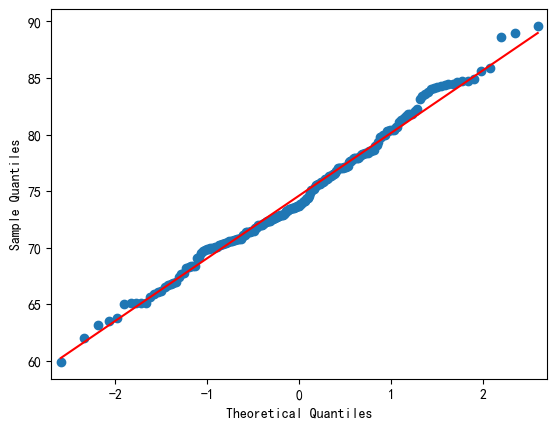

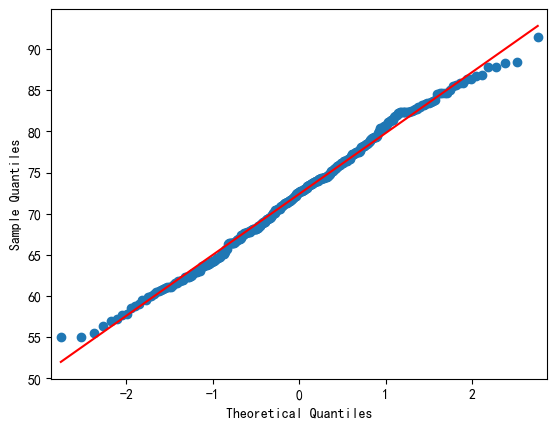

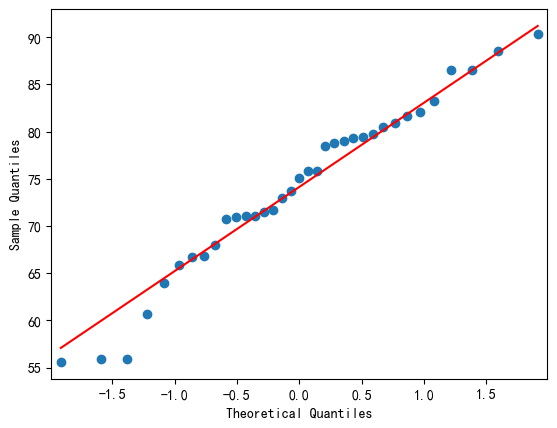

In [3]:
import statsmodels.api as sm #导入statsmodels.api包
import pylab

##分组绘制Q-Q图##
sm.qqplot(df.loc[df.loc[:,'DX']=='CN','AGE'], line='s') #选取第一组数据
pylab.show() #显示第一组QQ图
sm.qqplot(df.loc[df.loc[:,'DX']=='MCI','AGE'], line='s') #选取第二组数据
pylab.show() #显示第二组QQ图
sm.qqplot(df.loc[df.loc[:,'DX']=='AD','AGE'], line='s') #选取第三组数据
pylab.show() #显示第三组QQ图

In [13]:
from scipy import stats #导入scipy包

##正态性检验##
for feat in features:
    print("正态性检验指标：", feat)
    shapiro_test1 = stats.shapiro(df.loc[df.loc[:,'DX']=='CN',feat]) 
    print(shapiro_test1)
    shapiro_test2 = stats.shapiro(df.loc[df.loc[:,'DX']=='MCI',feat])
    print(shapiro_test2)
    shapiro_test3 = stats.shapiro(df.loc[df.loc[:,'DX']=='AD',feat])
    print(shapiro_test3)

正态性检验指标： PTGENDER
ShapiroResult(statistic=0.6362320184707642, pvalue=7.130287186684295e-21)
ShapiroResult(statistic=0.6234632730484009, pvalue=8.269627328687911e-27)
ShapiroResult(statistic=0.6229484677314758, pvalue=2.8744914004619204e-08)
正态性检验指标： PTMARRY
ShapiroResult(statistic=0.6465886831283569, pvalue=1.3309506500420841e-20)
ShapiroResult(statistic=0.5635302066802979, pvalue=1.8288335843878457e-28)
ShapiroResult(statistic=0.3729730248451233, pvalue=4.345507634284651e-11)
正态性检验指标： AGE
ShapiroResult(statistic=0.9905630350112915, pvalue=0.19017094373703003)
ShapiroResult(statistic=0.9922957420349121, pvalue=0.07153140008449554)
ShapiroResult(statistic=0.965001106262207, pvalue=0.3211611807346344)
正态性检验指标： PTEDUCAT
ShapiroResult(statistic=0.9314836263656616, pvalue=2.5369867984181838e-08)
ShapiroResult(statistic=0.9297050833702087, pvalue=1.1235831709477395e-11)
ShapiroResult(statistic=0.954386293888092, pvalue=0.15448163449764252)
正态性检验指标： CDRSB
ShapiroResult(statistic=0.24632841348

#### 方差齐性检验

In [6]:
##计算均数##
df_mean = df.groupby('DX').mean()
##计算标准差##
df_std = df.groupby('DX').std()
df_std

,PTGENDER,PTMARRY,AGE,PTEDUCAT,CDRSB,ADAS11,ADAS13,ADASQ4,MMSE,RAVLTimmediate,RAVLTlearning,RAVLTforgetting,RAVLTpercforgetting,LDELTOTAL,TRABSCOR,FAQ
DX,,,,,,,,,,,,,,,,
AD,0.497050,0.584103,9.039329,2.706978,1.582467,7.295446,8.803647,1.379319,1.936817,7.862599,1.945475,2.041997,19.153455,2.201222,76.223745,6.758375
CN,0.501057,0.772378,5.553973,2.683528,0.130602,2.669553,3.955605,1.749270,1.186625,9.382082,2.348913,2.605953,27.735623,3.118157,34.850020,0.522409
MCI,0.491759,0.664130,7.403382,2.785401,0.878767,4.386200,6.708250,2.555683,1.621118,10.864822,2.597243,2.524184,31.836357,3.398953,59.720370,4.019985


In [14]:
##levene法方差齐性检验##
for feat in features:
    print("方差齐性检验指标：", feat)
    group0 = df.loc[df.loc[:,'DX']=='CN'][feat] #选取第一组数据
    group1 = df.loc[df.loc[:,'DX']=='MCI'][feat] #选取第二组数据
    group2 = df.loc[df.loc[:,'DX']=='AD'][feat] #选取第三组数据
    leveneTestRes = stats.levene(group0, group1, group2, center='mean') #levene法齐性检验
    print(leveneTestRes) #显示检验结果

方差齐性检验指标： PTGENDER
LeveneResult(statistic=3.7308893865935624, pvalue=0.02454282695743227)
方差齐性检验指标： PTMARRY
LeveneResult(statistic=7.1651536121590285, pvalue=0.000842660611066381)
方差齐性检验指标： AGE
LeveneResult(statistic=13.257553505401807, pvalue=2.337640678623339e-06)
方差齐性检验指标： PTEDUCAT
LeveneResult(statistic=0.4465060859185194, pvalue=0.6400773738641607)
方差齐性检验指标： CDRSB
LeveneResult(statistic=131.45827453286142, pvalue=6.863671799229271e-48)
方差齐性检验指标： ADAS11
LeveneResult(statistic=33.9120458878202, pvalue=1.1586497377755423e-14)
方差齐性检验指标： ADAS13
LeveneResult(statistic=32.03258728596151, pvalue=6.275229778492364e-14)
方差齐性检验指标： ADASQ4
LeveneResult(statistic=24.627895748166274, pvalue=5.370960902004008e-11)
方差齐性检验指标： MMSE
LeveneResult(statistic=23.06380434108857, pvalue=2.2814299297224144e-10)
方差齐性检验指标： RAVLTimmediate
LeveneResult(statistic=4.546703264200508, pvalue=0.010978826804334258)
方差齐性检验指标： RAVLTlearning
LeveneResult(statistic=3.13918660289092, pvalue=0.044047388197947096)
方差齐性检验指标：

#### 正态分布、方差齐（Tukey's HSD 检验）

In [11]:
# import numpy as np
# import pandas as pd
# from statsmodels.stats.multicomp import pairwise_tukeyhsd
# import matplotlib.pyplot as plt

# # 执行 Tukey's HSD 检验
# tukey = pairwise_tukeyhsd(endog=df['AGE'], groups=df['DX'], alpha=0.05)

# # 输出检验结果
# print(tukey)

# # # 可视化 Tukey's HSD 结果
# # tukey.plot_simultaneous()
# # plt.show()

检验结果：AGE
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
    AD     CN   0.4734 0.9256 -2.4956 3.4424  False
    AD    MCI  -1.7366 0.3338 -4.6204 1.1472  False
    CN    MCI  -2.2099 0.0009 -3.6349 -0.785   True
---------------------------------------------------


#### 非正态分布（Dunn's 检验）

In [26]:
import numpy as np
import scipy.stats as stats
import scikit_posthocs as sp

xianzhu=[]
for feat in features:
    print("检验指标：", feat)
    group1 = df.loc[df.loc[:,'DX']=='CN'][feat] #选取第一组数据
    group2 = df.loc[df.loc[:,'DX']=='MCI'][feat] #选取第二组数据
    group3 = df.loc[df.loc[:,'DX']=='AD'][feat] #选取第三组数据
    # Kruskal-Wallis 检验
    stat, p = stats.kruskal(group1, group2, group3)

    print('Kruskal-Wallis test:')
    # 使用 f-string 格式化输出，保留四位有效数字
    print(f'Statistic = {stat:.4g}, p-value = {p:.4g}')
    if p<0.05:
        xianzhu.append(feat)

#     # 如果 Kruskal-Wallis 检验显著（p值小于0.05），进行 Dunn's 检验
#     if p < 0.05:
#         print("\nKruskal-Wallis test is significant. Performing Dunn's post-hoc test...")

#         # 合并数据和组标签
#         data = np.concatenate([group1, group2, group3])
#         groups = ['Group 1']*len(group1) + ['Group 2']*len(group2) + ['Group 3']*len(group3)

#         # Dunn's post-hoc 检验
#         dunn_results = sp.posthoc_dunn([group1, group2, group3], p_adjust='bonferroni')

#         print("\nDunn's test results (with Bonferroni correction):")
#         print(dunn_results)
#     else:
#         print("Kruskal-Wallis test is not significant. No further tests needed.")


检验指标： AGE
Kruskal-Wallis test:
Statistic = 12.37, p-value = 0.002064
检验指标： PTEDUCAT
Kruskal-Wallis test:
Statistic = 1.633, p-value = 0.442
检验指标： CDRSB
Kruskal-Wallis test:
Statistic = 450.2, p-value = 1.715e-98
检验指标： ADAS11
Kruskal-Wallis test:
Statistic = 184.3, p-value = 9.389e-41
检验指标： ADAS13
Kruskal-Wallis test:
Statistic = 194.1, p-value = 7.006e-43
检验指标： ADASQ4
Kruskal-Wallis test:
Statistic = 162.5, p-value = 5.069e-36
检验指标： MMSE
Kruskal-Wallis test:
Statistic = 157.4, p-value = 6.46e-35
检验指标： RAVLTimmediate
Kruskal-Wallis test:
Statistic = 146.8, p-value = 1.323e-32
检验指标： RAVLTlearning
Kruskal-Wallis test:
Statistic = 76.17, p-value = 2.884e-17
检验指标： RAVLTforgetting
Kruskal-Wallis test:
Statistic = 11.13, p-value = 0.003824
检验指标： RAVLTpercforgetting
Kruskal-Wallis test:
Statistic = 97.23, p-value = 7.691e-22
检验指标： LDELTOTAL
Kruskal-Wallis test:
Statistic = 351.4, p-value = 4.881e-77
检验指标： TRABSCOR
Kruskal-Wallis test:
Statistic = 83.83, p-value = 6.255e-19
检验指标： FAQ
Kruskal-Wa

#### 卡方检验

In [39]:
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency

# 创建列联表
contingency_table = pd.crosstab(df['PTGENDER'], df['DX'])

# 打印列联表
print("Contingency Table:")
print(contingency_table)

# 进行卡方检验
chi2, p, dof, expected = chi2_contingency(contingency_table)

# 打印结果
print(f'\nChi-squared Statistic = {chi2:.4g}, p-value = {p:.4g}')
print(f'Degrees of freedom = {dof}')
print('Expected frequencies:')
print(expected)


Contingency Table:
DX        AD   CN  MCI
PTGENDER              
0         21  102  205
1         14  107  140

Chi-squared Statistic = 6.225, p-value = 0.04449
Degrees of freedom = 2
Expected frequencies:
[[ 19.49066214 116.38709677 192.12224109]
 [ 15.50933786  92.61290323 152.87775891]]


#### fisher exact 检验

In [43]:
from scipy.stats import fisher_exact

# 创建列联表
contingency_table = pd.crosstab(df['PTMARRY'], df['DX'])

# 打印列联表
print("Contingency Table:")
print(contingency_table)

# # 进行 Fisher's Exact Test
# odds_ratio, p_value = fisher_exact(contingency_table)

# # 打印结果
# print(f'\nFisher\'s Exact Test:')
# print(f'Odds Ratio = {odds_ratio:.4g}, p-value = {p_value:.4g}')

chi2, p, dof, expected = chi2_contingency(contingency_table)

# 打印结果
print(f'\nChi-squared Statistic = {chi2:.4g}, p-value = {p:.4g}')
print(f'Degrees of freedom = {dof}')
print('Expected frequencies:')
print(expected)

Contingency Table:
DX       AD   CN  MCI
PTMARRY              
0         0    7    6
1        31  151  271
2         1   20   33
3         3   31   35

Chi-squared Statistic = 8.052, p-value = 0.2343
Degrees of freedom = 6
Expected frequencies:
[[  0.77249576   4.61290323   7.61460102]
 [ 26.91850594 160.74193548 265.33955857]
 [  3.20882852  19.16129032  31.62988115]
 [  4.10016978  24.48387097  40.41595925]]


In [47]:
# 根据组别进行分组并计算指标
for feat in features:
    print(f"\n检验指标：{feat}")
    
    # 对每个组进行计算
    for group in df['DX'].unique():
        group_data = df[df['DX'] == group][feat]
        
        # 计算中位数
        median_value = group_data.median()
        
        # 计算四分位数
        Q1 = group_data.quantile(0.25)
        Q3 = group_data.quantile(0.75)

        # 打印结果
        print(f'{group}: {median_value}({Q1}-{Q3})')


检验指标：AGE
CN: 73.7(70.8-78.2)
MCI: 72.6(67.4-77.5)
AD: 75.1(69.35-80.1)

检验指标：PTEDUCAT
CN: 16.0(14.0-18.0)
MCI: 16.0(14.0-18.0)
AD: 16.0(14.0-18.0)

检验指标：CDRSB
CN: 0.0(0.0-0.0)
MCI: 1.5(1.0-2.0)
AD: 4.5(3.75-5.5)

检验指标：ADAS11
CN: 5.33(3.67-7.0)
MCI: 9.0(6.0-12.0)
AD: 18.0(14.5-22.5)

检验指标：ADAS13
CN: 9.0(6.0-11.0)
MCI: 14.67(10.0-19.67)
AD: 28.0(24.0-32.5)

检验指标：ADASQ4
CN: 3.0(2.0-4.0)
MCI: 5.0(3.0-7.0)
AD: 9.0(8.0-10.0)

检验指标：MMSE
CN: 29.0(28.0-30.0)
MCI: 28.0(27.0-29.0)
AD: 23.0(21.0-24.5)

检验指标：RAVLTimmediate
CN: 45.0(38.0-52.0)
MCI: 35.0(28.0-44.0)
AD: 22.4430392292573(17.0-26.5)

检验指标：RAVLTlearning
CN: 6.0(4.0-8.0)
MCI: 4.0(3.0-6.0)
AD: 2.0(1.0-3.5)

检验指标：RAVLTforgetting
CN: 3.0(2.0-5.0)
MCI: 4.0(3.0-6.0)
AD: 5.0(3.0-5.5)

检验指标：RAVLTpercforgetting
CN: 33.3333(16.6667-50.0)
MCI: 50.0(30.0-83.3333)
AD: 100.0(80.55555-100.0)

检验指标：LDELTOTAL
CN: 13.0(11.0-15.0)
MCI: 7.0(4.0-9.0)
AD: 1.0(0.0-4.0)

检验指标：TRABSCOR
CN: 75.0(56.0-93.0)
MCI: 87.0(66.0-121.0)
AD: 228.0(145.99410400086748-283.5